In [15]:
import pylab as pl
import numpy as np
import matplotlib as mpl
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups

import multiprocessing as multp



In [4]:
data = fetch_20newsgroups(subset='all', shuffle=True)

print 'Texts = ',len(data.data)
print 'Categories =',len(data.target_names)
print 'List of the all categories - ',list(data.target_names)



Texts =  18846
Categories = 20
List of the all categories -  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
tf_idf = TfidfVectorizer(stop_words='english').fit_transform(data.data)
print'Matrix shape =',tf_idf.shape

Matrix size =  (18846, 173452)


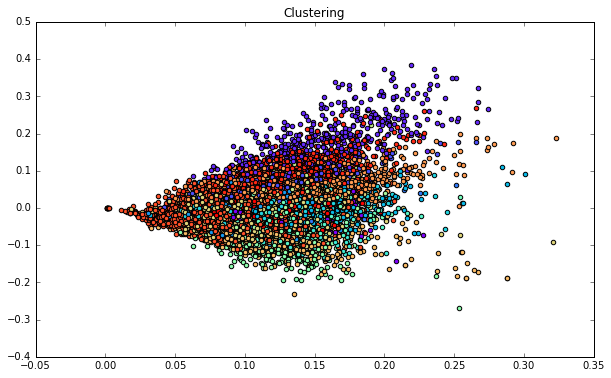

In [17]:
kms = KMeans(n_clusters=len(data.target_names), n_init = 1,n_jobs=multp.cpu_count())
res = kms.fit(tf_idf)
trunc_svd = TruncatedSVD(2).fit_transform(tf_idf)
color = matplotlib.cm.rainbow(np.linspace(0, 1, 20))

pl.figure(figsize = (10, 6))
pl.title("Clustering")
for item in range(0, trunc_svd.shape[0]):
    pl.scatter(trunc_svd[item,0], trunc_svd[item,1], c=color[res.labels_[item]])

pl.show()